# Построение сети LeNet

## Описание

Пострить и обучить сверточную нейронную сеть на наборе данных с одеждой.
Задача: accuracy на тестовой выборке должно быть не меньше 87%.

Задача решается с использованием GPU-тренажера Yandex.Practicum.

## Импорт необходимых библиотек

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D
from tensorflow.keras.optimizers import Adam
import numpy as np

## Функция загрузки обучающих данных

Приведем яркость изображений из обучающей выборки к диапазону [0, 1], поскольку в этом диапазоне всегда находится яркость изображений из тестовой выборки.

In [ ]:
def load_train(path):
    features_train = np.load(path + 'train_features.npy')
    target_train = np.load(path + 'train_target.npy')
    features_train = features_train.reshape(-1, 28, 28, 1) / 255.0
    return features_train, target_train

## Функция создания модели

Строение сети LeNet:
1. 2 сверточных слоя размером 5х5, чередующихся с Average Pooling размером 2х2. (Постепенно они уменьшают пространственное разрешение и собирают разбросанную по всему изображению информацию в матрицы маленького размера)
2. Слой Flattern, чтобы сделать многомерный тензор одномерным.
3. 3 полносвязных слоя, которые собирают все признаки и классифицируют их.

Для оптимизации будем использовать алгоритм Adam с показателем learning rate = 0.01. В качестве активации везде будем использовать ReLU, кроме как для последнего слоя (SoftMax). В качестве функции потерь используется *sparse_categorical_crossentropy*.

In [ ]:
def create_model(input_shape):
    model = Sequential()
    optimizer = Adam(lr=0.01) 
    model.add(Conv2D(filters=6, kernel_size=(5, 5), input_shape=(28, 28, 1), padding='same', activation='relu'))
    model.add(AvgPool2D(pool_size=(2, 2), strides=None, padding='valid'))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(AvgPool2D(pool_size=(2, 2), strides=None, padding='valid'))
    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
    
    return model

## Обучение модели

In [ ]:
def train_model(model, train_data, test_data, batch_size=32, epochs=5,
               steps_per_epoch=None, validation_steps=None):

    features_train, target_train = train_data
    features_test, target_test = test_data
    model.fit(features_train, target_train, 
              validation_data=(features_test, target_test),
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
    return model 

## Результат обучения модели

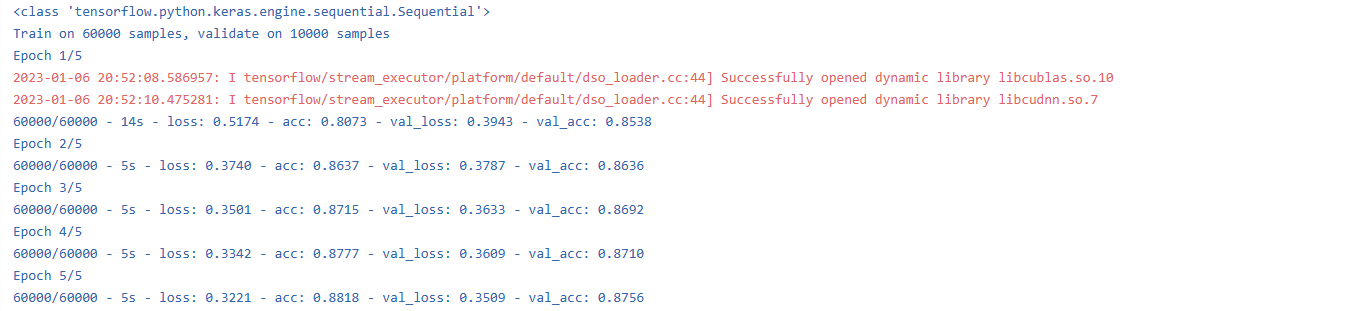

## Анализ результатов

Построенная модель позволяет классифицировать одежду с точностью 87%, что соответсвует условию задачи.